# Sergei Moneyschenko

This notebook covers my attempt at putting together Prompt engineering, Data Science & cryptocurrency algorithmic trading to learn about optimal trading strategies

# Looking at potential trading margins

The gains of a potential speculative strategy are studied by plotting 2 pairs

- `BTC/USD`
- `CRO/USD`

It's a simple "buy low and sell high" trading strategy only using these 2 instruments. I visualise what my potential margins are by plotting the % price change of the two on the same timeseries whilst highlighting filling only the areas where one offsets against the other. In layman terms: the coloured areas are the moments where we can make money

[*********************100%%**********************]  3 of 3 completed


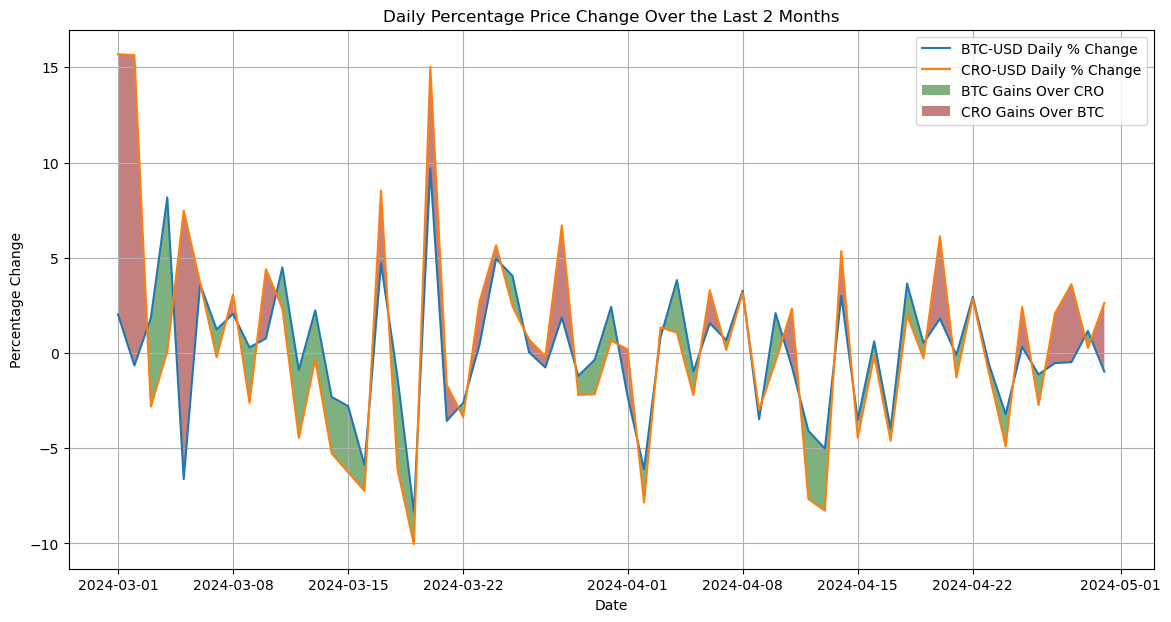

In [23]:
%run scripts/daily_change.py

# Putting it to the test

The visualisation shows me that there's room for margins, however. How will this behave in the wild?

I create a simple strategy with some rules:

- On every tick, we compute the percentual change of both instruments vs the day before
- if the change of one is greater than the other. e,g: BTC became more expensive than CRO
- We buy CRO with BTC
- We rinse & repeat

[*********************100%%**********************]  2 of 2 completed


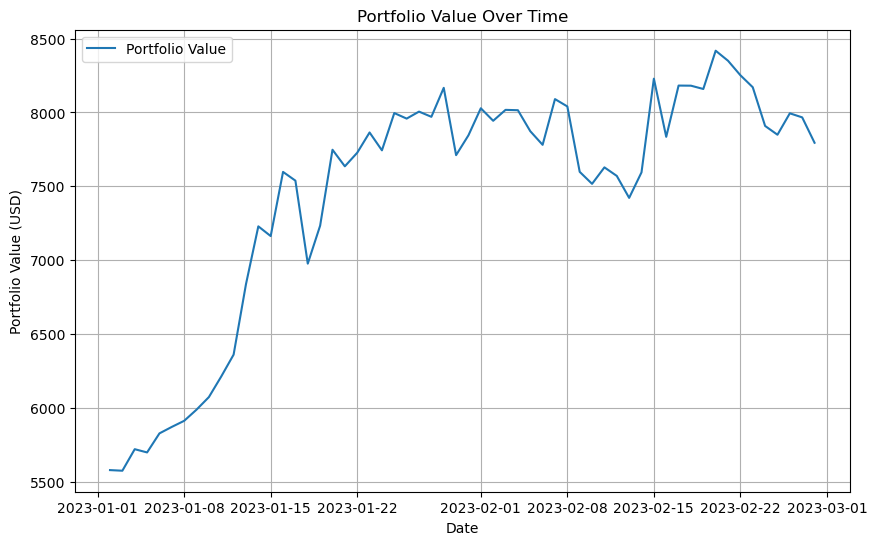

In [18]:
%run scripts/basic_speculation.py

# Measuring different strategies

Now that a foundation is set, I can draw N strategies on the canvas to measure how different approaches increase my portfolio value. A proposed problem for ML to solve would be to:

- Optimise the parameters to find the best strategy
- Optimise the parameters to find the best instruments
- Optimise the parameters to find the best trading frequency

 🌟 The outcome is to have the highest portfolio value which makes it very simple

[*********************100%%**********************]  2 of 2 completed


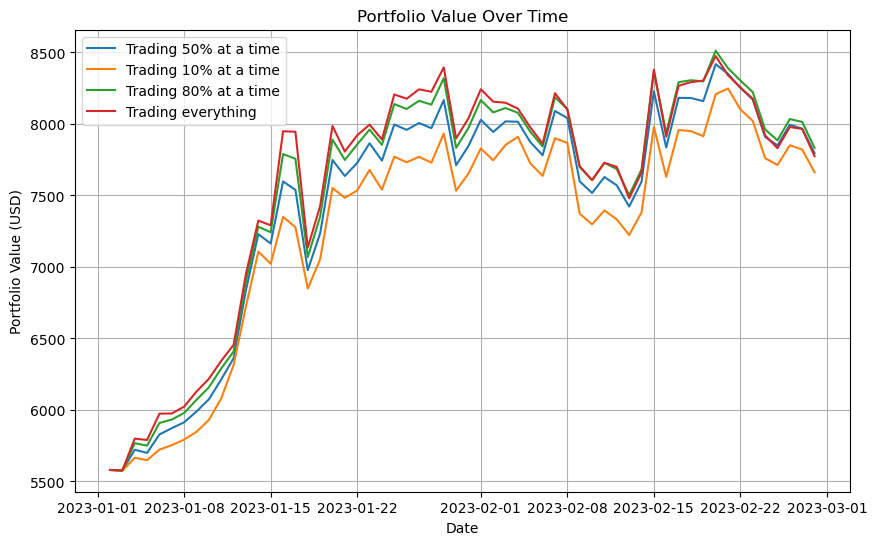

In [24]:
%run scripts/multi_strategy_speculation.py